In [1]:
## Balanced Data

import pandas as pd
import glob

dest_data_dir='/home/jupyter/data/master/'
flat_data_dir='/home/jupyter/data/csv/'

def select_balanced_sample(dirloc):
    
    fire_sample = pd.read_csv(dirloc)
    on_fire_grids=fire_sample[fire_sample['on_fire']==1]
    unlit_grids=fire_sample[fire_sample['on_fire']==0]
    num_fire_grids=len(on_fire_grids.index)
    #print(num_fire_grids)
    unlit_grids_balanced=unlit_grids.sample(n=num_fire_grids,random_state =2323)
    frames=[on_fire_grids,unlit_grids_balanced]
    return pd.concat(frames, ignore_index = True).reset_index(drop=True)

def create_master_sample():
    list_ = []
    allFiles = glob.glob(flat_data_dir + "*.csv")
    for file_ in allFiles:
        df = select_balanced_sample(file_)
        df['fire_id']=file_.replace('/home/jupyter/data/csv/','').replace('.csv','')
        list_.append(df)

    return pd.concat(list_, axis = 0, ignore_index = True)

In [13]:
create_master_sample().landcover = create_master_sample().landcover.astype(str)

In [15]:
Data=create_master_sample()
drop_cols=['gid','us_gid_to_','state', 'NAME', 'lcmajority','population','geometry','Unnamed: 0']
Data.drop(drop_cols, axis=1, inplace=True)

In [18]:
Data['PercentageChangeWtr']=((Data['temp2016']-Data['temp2015'])/Data['temp2015'])
Data['AVGWtr']=Data[['temp2008','temp2009','temp2010','temp2011','temp2012','temp2013','temp2014','temp2015']].mean(axis=1)
Data['AVGPCTChangeWtr']=((Data['temp2016']-Data['AVGWtr'])/Data['AVGWtr'])
Data['PercentageChangePrc']=((Data['prcp2016']-Data['prcp2015'])/Data['prcp2015'])
Data['AVGprcp']=Data[['prcp2008','prcp2009','prcp2010','prcp2011','prcp2012','prcp2013','prcp2014','prcp2015']].mean(axis=1)
Data['AVGPCTChangeprcp']=((Data['prcp2016']-Data['AVGprcp'])/Data['AVGprcp'])

In [22]:
Data.landcover = Data.landcover.astype(str)
Data.dtypes

on_fire                  int64
elevation              float64
landcover               object
temp2014               float64
prcp2014               float64
temp2015               float64
prcp2015               float64
temp2012               float64
prcp2012               float64
temp2007               float64
prcp2007               float64
temp2013               float64
prcp2013               float64
temp2009               float64
prcp2009               float64
temp2011               float64
prcp2011               float64
temp2010               float64
prcp2010               float64
temp2016               float64
prcp2016               float64
temp2008               float64
prcp2008               float64
pop_sqkm               float64
fire_id                 object
PercentageChangeWtr    float64
AVGWtr                 float64
AVGPCTChangeWtr        float64
PercentageChangePrc    float64
AVGprcp                float64
AVGPCTChangeprcp       float64
dtype: object

In [40]:
Data_Truncated=Data[['on_fire','elevation','landcover','pop_sqkm','AVGPCTChangeWtr','AVGPCTChangeprcp','fire_id','prcp2016','prcp2015','prcp2014',
          'temp2016','temp2015','temp2014']]

In [41]:
Data_Truncated.head()

,on_fire,elevation,landcover,pop_sqkm,AVGPCTChangeWtr,AVGPCTChangeprcp,fire_id,prcp2016,prcp2015,prcp2014,temp2016,temp2015,temp2014
0,1,1594.0,46.0,0.188634,0.020710,1.162027,AZASF-000599,0.03724,0.017912,0.018733,67.262295,62.613263,64.411733
1,1,1665.0,46.0,0.188634,0.020731,1.162519,AZASF-000599,0.03724,0.017896,0.018717,67.262295,62.607112,64.407213
2,1,1924.0,47.0,0.188634,0.020757,1.163150,AZASF-000599,0.03724,0.017877,0.018696,67.262295,62.599222,64.401414
3,1,1807.0,47.0,0.188634,0.020737,1.162675,AZASF-000599,0.03724,0.017891,0.018712,67.262295,62.605161,64.405779
4,0,1596.0,461.0,0.188634,0.021256,1.175086,AZASF-000599,0.03724,0.017507,0.018310,67.262295,62.450899,64.292414


In [42]:
#I seperate the data into numerical and text
numeric_variables_index = list(Data_Truncated.dtypes[Data_Truncated.dtypes != "object"].index) 
Data_Truncated[numeric_variables_index].head(3) 

,on_fire,elevation,pop_sqkm,AVGPCTChangeWtr,AVGPCTChangeprcp,prcp2016,prcp2015,prcp2014,temp2016,temp2015,temp2014
0,1,1594.0,0.188634,0.020710,1.162027,0.03724,0.017912,0.018733,67.262295,62.613263,64.411733
1,1,1665.0,0.188634,0.020731,1.162519,0.03724,0.017896,0.018717,67.262295,62.607112,64.407213
2,1,1924.0,0.188634,0.020757,1.163150,0.03724,0.017877,0.018696,67.262295,62.599222,64.401414


In [43]:
text_variables_index = list(Data_Truncated.dtypes[Data_Truncated.dtypes == "object"].index)
Data_Truncated[text_variables_index].head(3)

,landcover,fire_id
0,46.0,AZASF-000599
1,46.0,AZASF-000599
2,47.0,AZASF-000599


In [95]:
Y = Data_Truncated[['on_fire','fire_id']]
X = Data_Truncated.drop('on_fire', axis = 1)

In [45]:
X.head()

,elevation,landcover,pop_sqkm,AVGPCTChangeWtr,AVGPCTChangeprcp,fire_id,prcp2016,prcp2015,prcp2014,temp2016,temp2015,temp2014
0,1594.0,46.0,0.188634,0.020710,1.162027,AZASF-000599,0.03724,0.017912,0.018733,67.262295,62.613263,64.411733
1,1665.0,46.0,0.188634,0.020731,1.162519,AZASF-000599,0.03724,0.017896,0.018717,67.262295,62.607112,64.407213
2,1924.0,47.0,0.188634,0.020757,1.163150,AZASF-000599,0.03724,0.017877,0.018696,67.262295,62.599222,64.401414
3,1807.0,47.0,0.188634,0.020737,1.162675,AZASF-000599,0.03724,0.017891,0.018712,67.262295,62.605161,64.405779
4,1596.0,461.0,0.188634,0.021256,1.175086,AZASF-000599,0.03724,0.017507,0.018310,67.262295,62.450899,64.292414


In [96]:
Y.head()

,on_fire,fire_id
0,1,AZASF-000599
1,1,AZASF-000599
2,1,AZASF-000599
3,1,AZASF-000599
4,0,AZASF-000599


In [46]:
numeric_variables_index.remove('on_fire')

In [47]:
#I get categorical variables from X
X_categorical = X.drop(numeric_variables_index, axis=1)
X_categorical.head()

,landcover,fire_id
0,46.0,AZASF-000599
1,46.0,AZASF-000599
2,47.0,AZASF-000599
3,47.0,AZASF-000599
4,461.0,AZASF-000599


In [48]:
#I create dummy variables
X_categorical_dummies = pd.get_dummies(X_categorical[['landcover']], drop_first=True)
X_categorical_dummies.head()

,landcover_1.0,landcover_107.0,landcover_108.0,landcover_117.0,landcover_13.0,landcover_137.0,landcover_138.0,landcover_139.0,landcover_140.0,landcover_141.0,...,landcover_583.0,landcover_584.0,landcover_60.0,landcover_8.0,landcover_83.0,landcover_84.0,landcover_85.0,landcover_87.0,landcover_90.0,landcover_95.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_categorical_dummies['fire_id'] = X.fire_id
X_categorical_dummies.head()

,landcover_1.0,landcover_107.0,landcover_108.0,landcover_117.0,landcover_13.0,landcover_137.0,landcover_138.0,landcover_139.0,landcover_140.0,landcover_141.0,...,landcover_584.0,landcover_60.0,landcover_8.0,landcover_83.0,landcover_84.0,landcover_85.0,landcover_87.0,landcover_90.0,landcover_95.0,fire_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599


In [71]:
## Split Fire Ids
from sklearn.model_selection import train_test_split
fireid_train, fireid_test = train_test_split(list(set(X.fire_id)), test_size=0.3, random_state=111)
Numeric_train_set = X[X.fire_id.isin(fireid_train)]
Numeric_test_set = X[X.fire_id.isin(fireid_test)]
Categorical_train_set = X_categorical_dummies[X_categorical_dummies.fire_id.isin(fireid_train)]
Categorical_test_set = X_categorical_dummies[X_categorical_dummies.fire_id.isin(fireid_test)]

In [72]:
Numeric_train_set.head()

,elevation,landcover,pop_sqkm,AVGPCTChangeWtr,AVGPCTChangeprcp,fire_id,prcp2016,prcp2015,prcp2014,temp2016,temp2015,temp2014
0,1594.0,46.0,0.188634,0.020710,1.162027,AZASF-000599,0.03724,0.017912,0.018733,67.262295,62.613263,64.411733
1,1665.0,46.0,0.188634,0.020731,1.162519,AZASF-000599,0.03724,0.017896,0.018717,67.262295,62.607112,64.407213
2,1924.0,47.0,0.188634,0.020757,1.163150,AZASF-000599,0.03724,0.017877,0.018696,67.262295,62.599222,64.401414
3,1807.0,47.0,0.188634,0.020737,1.162675,AZASF-000599,0.03724,0.017891,0.018712,67.262295,62.605161,64.405779
4,1596.0,461.0,0.188634,0.021256,1.175086,AZASF-000599,0.03724,0.017507,0.018310,67.262295,62.450899,64.292414


In [76]:
Categorical_train_set.head()

,landcover_1.0,landcover_107.0,landcover_108.0,landcover_117.0,landcover_13.0,landcover_137.0,landcover_138.0,landcover_139.0,landcover_140.0,landcover_141.0,...,landcover_584.0,landcover_60.0,landcover_8.0,landcover_83.0,landcover_84.0,landcover_85.0,landcover_87.0,landcover_90.0,landcover_95.0,fire_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AZASF-000599


In [77]:
Numeric_test_set.head()

,elevation,landcover,pop_sqkm,AVGPCTChangeWtr,AVGPCTChangeprcp,fire_id,prcp2016,prcp2015,prcp2014,temp2016,temp2015,temp2014
200,1000.0,489.0,0.546638,0.016245,0.234279,IDTFD-000375,0.025336,0.021267,0.026849,50.183053,51.511509,51.047857
201,1007.0,489.0,0.546638,0.016311,0.233836,IDTFD-000375,0.025269,0.021211,0.026777,50.182974,51.507191,51.044334
202,1008.0,489.0,0.546638,0.016249,0.234719,IDTFD-000375,0.025319,0.021253,0.026825,50.175974,51.503478,51.040437
203,1007.0,489.0,0.546638,0.016186,0.235622,IDTFD-000375,0.025370,0.021296,0.026875,50.168840,51.499717,51.036480
204,1015.0,489.0,0.546638,0.016191,0.236075,IDTFD-000375,0.025352,0.021281,0.026850,50.161553,51.491405,51.028804


In [78]:
Categorical_test_set.head()

,landcover_1.0,landcover_107.0,landcover_108.0,landcover_117.0,landcover_13.0,landcover_137.0,landcover_138.0,landcover_139.0,landcover_140.0,landcover_141.0,...,landcover_584.0,landcover_60.0,landcover_8.0,landcover_83.0,landcover_84.0,landcover_85.0,landcover_87.0,landcover_90.0,landcover_95.0,fire_id
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,IDTFD-000375
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,IDTFD-000375
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,IDTFD-000375
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,IDTFD-000375
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,IDTFD-000375


In [80]:
import numpy as np
Numeric_train_set['elevation_Norm'] = (Numeric_train_set['elevation']
                        - Numeric_train_set.groupby('fire_id')['elevation'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['elevation'].transform(np.std)+ 0.001)

Numeric_train_set['pop_sqkm_Norm'] = (Numeric_train_set['pop_sqkm']
                        - Numeric_train_set.groupby('fire_id')['pop_sqkm'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['pop_sqkm'].transform(np.std)+ 0.001)

Numeric_train_set['AVGPCTChangeWtr_Norm'] = (Numeric_train_set['AVGPCTChangeWtr']
                        - Numeric_train_set.groupby('fire_id')['AVGPCTChangeWtr'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['AVGPCTChangeWtr'].transform(np.std)+ 0.001)

Numeric_train_set['AVGPCTChangeprcp_Norm'] = (Numeric_train_set['AVGPCTChangeprcp']
                        - Numeric_train_set.groupby('fire_id')['AVGPCTChangeprcp'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['AVGPCTChangeprcp'].transform(np.std)+ 0.001)

Numeric_train_set['prcp2016_Norm'] = (Numeric_train_set['prcp2016']
                        - Numeric_train_set.groupby('fire_id')['prcp2016'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['prcp2016'].transform(np.std)+ 0.001)

Numeric_train_set['prcp2015_Norm'] = (Numeric_train_set['prcp2015']
                        - Numeric_train_set.groupby('fire_id')['prcp2015'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['prcp2015'].transform(np.std)+ 0.001)

Numeric_train_set['prcp2014_Norm'] = (Numeric_train_set['prcp2014']
                        - Numeric_train_set.groupby('fire_id')['prcp2014'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['prcp2014'].transform(np.std)+ 0.001)

Numeric_train_set['temp2016_Norm'] = (Numeric_train_set['temp2016']
                        - Numeric_train_set.groupby('fire_id')['temp2016'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['temp2016'].transform(np.std)+ 0.001)

Numeric_train_set['temp2015_Norm'] = (Numeric_train_set['temp2015']
                        - Numeric_train_set.groupby('fire_id')['temp2015'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['temp2015'].transform(np.std)+ 0.001)

Numeric_train_set['temp2014_Norm'] = (Numeric_train_set['temp2014']
                        - Numeric_train_set.groupby('fire_id')['temp2014'].transform(np.mean)) \
                        / (Numeric_train_set.groupby('fire_id')['temp2014'].transform(np.std)+ 0.001)

Numeric_train_set.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

,elevation,landcover,pop_sqkm,AVGPCTChangeWtr,AVGPCTChangeprcp,fire_id,prcp2016,prcp2015,prcp2014,temp2016,...,elevation_Norm,pop_sqkm_Norm,AVGPCTChangeWtr_Norm,AVGPCTChangeprcp_Norm,prcp2016_Norm,prcp2015_Norm,prcp2014_Norm,temp2016_Norm,temp2015_Norm,temp2014_Norm
0,1594.0,46.0,0.188634,0.020710,1.162027,AZASF-000599,0.03724,0.017912,0.018733,67.262295,...,-0.185462,-0.342356,-0.036223,-0.145459,0.0,0.028434,0.029504,0.0,0.162719,0.162029
1,1665.0,46.0,0.188634,0.020731,1.162519,AZASF-000599,0.03724,0.017896,0.018717,67.262295,...,0.188092,-0.342356,-0.020101,-0.081695,0.0,0.015760,0.016354,0.0,0.090191,0.089809
2,1924.0,47.0,0.188634,0.020757,1.163150,AZASF-000599,0.03724,0.017877,0.018696,67.262295,...,1.550775,-0.342356,0.000581,0.000150,0.0,-0.000499,-0.000517,0.0,-0.002854,-0.002842
3,1807.0,47.0,0.188634,0.020737,1.162675,AZASF-000599,0.03724,0.017891,0.018712,67.262295,...,0.935200,-0.342356,-0.014988,-0.061463,0.0,0.011740,0.012182,0.0,0.067185,0.066900
4,1596.0,461.0,0.188634,0.021256,1.175086,AZASF-000599,0.03724,0.017507,0.018310,67.262295,...,-0.174939,-0.342356,0.389573,1.547597,0.0,-0.306137,-0.317657,0.0,-1.751897,-1.744476


In [81]:
import numpy as np
Numeric_test_set['elevation_Norm'] = (Numeric_test_set['elevation']
                        - Numeric_test_set.groupby('fire_id')['elevation'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['elevation'].transform(np.std)+ 0.001)

Numeric_test_set['pop_sqkm_Norm'] = (Numeric_test_set['pop_sqkm']
                        - Numeric_test_set.groupby('fire_id')['pop_sqkm'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['pop_sqkm'].transform(np.std)+ 0.001)

Numeric_test_set['AVGPCTChangeWtr_Norm'] = (Numeric_test_set['AVGPCTChangeWtr']
                        - Numeric_test_set.groupby('fire_id')['AVGPCTChangeWtr'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['AVGPCTChangeWtr'].transform(np.std)+ 0.001)

Numeric_test_set['AVGPCTChangeprcp_Norm'] = (Numeric_test_set['AVGPCTChangeprcp']
                        - Numeric_test_set.groupby('fire_id')['AVGPCTChangeprcp'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['AVGPCTChangeprcp'].transform(np.std)+ 0.001)

Numeric_test_set['prcp2016_Norm'] = (Numeric_test_set['prcp2016']
                        - Numeric_test_set.groupby('fire_id')['prcp2016'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['prcp2016'].transform(np.std)+ 0.001)

Numeric_test_set['prcp2015_Norm'] = (Numeric_test_set['prcp2015']
                        - Numeric_test_set.groupby('fire_id')['prcp2015'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['prcp2015'].transform(np.std)+ 0.001)

Numeric_test_set['prcp2014_Norm'] = (Numeric_test_set['prcp2014']
                        - Numeric_test_set.groupby('fire_id')['prcp2014'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['prcp2014'].transform(np.std)+ 0.001)

Numeric_test_set['temp2016_Norm'] = (Numeric_test_set['temp2016']
                        - Numeric_test_set.groupby('fire_id')['temp2016'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['temp2016'].transform(np.std)+ 0.001)

Numeric_test_set['temp2015_Norm'] = (Numeric_test_set['temp2015']
                        - Numeric_test_set.groupby('fire_id')['temp2015'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['temp2015'].transform(np.std)+ 0.001)

Numeric_test_set['temp2014_Norm'] = (Numeric_test_set['temp2014']
                        - Numeric_test_set.groupby('fire_id')['temp2014'].transform(np.mean)) \
                        / (Numeric_test_set.groupby('fire_id')['temp2014'].transform(np.std)+ 0.001)

Numeric_test_set.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

,elevation,landcover,pop_sqkm,AVGPCTChangeWtr,AVGPCTChangeprcp,fire_id,prcp2016,prcp2015,prcp2014,temp2016,...,elevation_Norm,pop_sqkm_Norm,AVGPCTChangeWtr_Norm,AVGPCTChangeprcp_Norm,prcp2016_Norm,prcp2015_Norm,prcp2014_Norm,temp2016_Norm,temp2015_Norm,temp2014_Norm
200,1000.0,489.0,0.546638,0.016245,0.234279,IDTFD-000375,0.025336,0.021267,0.026849,50.183053,...,-0.341675,-0.256692,-0.111185,0.079847,0.118459,0.107032,0.132022,0.081801,0.270416,0.246447
201,1007.0,489.0,0.546638,0.016311,0.233836,IDTFD-000375,0.025269,0.021211,0.026777,50.182974,...,-0.299592,-0.256692,-0.069142,0.030908,0.074473,0.068189,0.084945,0.080745,0.205217,0.190047
202,1008.0,489.0,0.546638,0.016249,0.234719,IDTFD-000375,0.025319,0.021253,0.026825,50.175974,...,-0.293580,-0.256692,-0.108503,0.128422,0.107107,0.097274,0.116506,-0.012404,0.149165,0.127645
203,1007.0,489.0,0.546638,0.016186,0.235622,IDTFD-000375,0.025370,0.021296,0.026875,50.168840,...,-0.299592,-0.256692,-0.148774,0.228056,0.140783,0.127297,0.149066,-0.107326,0.092369,0.064281
204,1015.0,489.0,0.546638,0.016191,0.236075,IDTFD-000375,0.025352,0.021281,0.026850,50.161553,...,-0.251497,-0.256692,-0.145556,0.278010,0.128766,0.116905,0.132679,-0.204299,-0.033124,-0.058622


In [101]:
Numeric_train_set=Numeric_train_set
drop_cols=['elevation','pop_sqkm','AVGPCTChangeWtr', 'AVGPCTChangeprcp', 'prcp2016','prcp2015','prcp2014','temp2016',
           'temp2015','temp2014']
Numeric_train_set.drop(drop_cols, axis=1, inplace=True)

In [102]:
Numeric_test_set=Numeric_test_set
drop_cols=['elevation','pop_sqkm','AVGPCTChangeWtr', 'AVGPCTChangeprcp', 'prcp2016','prcp2015','prcp2014','temp2016',
           'temp2015','temp2014']
Numeric_test_set.drop(drop_cols, axis=1, inplace=True)

In [88]:

Categorical_train_set.drop('fire_id',inplace=True,axis=1)
Categorical_test_set.drop('fire_id',inplace=True,axis=1)


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [103]:
#I then horizontally stack both numeric and categorical variables back into train and test data
X_train = np.hstack((Numeric_train_set, Categorical_train_set.values))
X_test = np.hstack((Numeric_test_set, Categorical_test_set.values))

In [104]:
## Split Fire Ids:Y
Y_train_set = Y[Y.fire_id.isin(fireid_train)]
Y_test_set = Y[Y.fire_id.isin(fireid_test)]

In [105]:
Y_train_set.drop('fire_id',inplace=True,axis=1)
Y_test_set.drop('fire_id',inplace=True,axis=1)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Logistic Model

In [106]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='lbfgs')
log_reg.fit(X_train,Y_train_set)

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [107]:
print('Accuracy on the training subset:{:.3f}'.format(log_reg.score(X_train,Y_train_set)))
print('Accuracy on the test subset:{:.3f}'.format(log_reg.score(X_test,Y_test_set)))

Accuracy on the training subset:0.633
Accuracy on the test subset:0.611


----Confusion Matrix----


Text(69.0, 0.5, 'Actual')

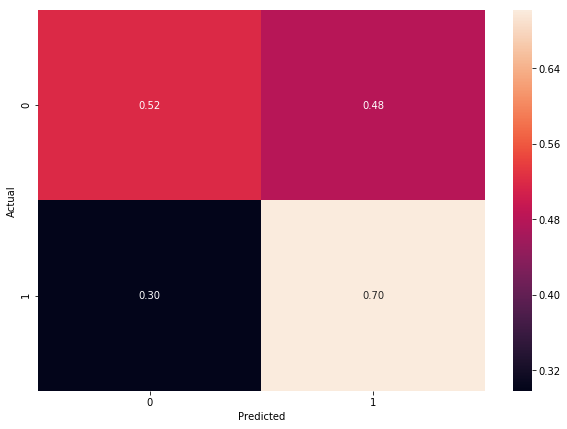

In [135]:
print( "----Confusion Matrix----")
Confusion_Matrix=confusion_matrix(Y_test_set,log_reg.predict(X_test))
Prop_Confusion_Matrix=Confusion_Matrix / Confusion_Matrix.astype(np.float).sum(axis=1)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(Prop_Confusion_Matrix,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

----Confusion Matrix----


Text(69.0, 0.5, 'Actual')

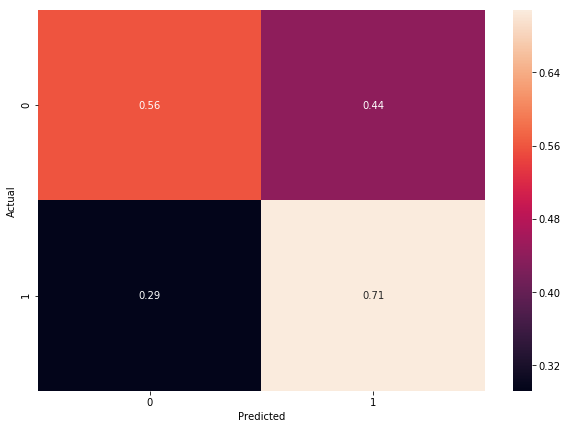

In [172]:
print( "----Confusion Matrix----")
Confusion_Matrix=confusion_matrix(Y_train_set,log_reg.predict(X_train))
Prop_Confusion_Matrix=Confusion_Matrix / Confusion_Matrix.astype(np.float).sum(axis=1)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(Prop_Confusion_Matrix,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [136]:
print( "----Classification Report----")
Test_Classification_Report=classification_report(Y_test_set,log_reg.predict(X_test))
print(Test_Classification_Report)

----Classification Report----
              precision    recall  f1-score   support

           0       0.64      0.52      0.57      6578
           1       0.59      0.70      0.64      6578

   micro avg       0.61      0.61      0.61     13156
   macro avg       0.61      0.61      0.61     13156
weighted avg       0.61      0.61      0.61     13156



In [169]:
print( "----Classification Report----")
Test_Classification_Report=classification_report(Y_train_set,log_reg.predict(X_train))
print(Test_Classification_Report)

----Classification Report----
              precision    recall  f1-score   support

           0       0.66      0.56      0.60     13386
           1       0.62      0.71      0.66     13386

   micro avg       0.63      0.63      0.63     26772
   macro avg       0.64      0.63      0.63     26772
weighted avg       0.64      0.63      0.63     26772



In [144]:
    Predicted_Y_Train_probs_L = log_reg.predict_proba(X_train)[:,1]
    Train_AUC_L = roc_auc_score(Y_train_set,  Predicted_Y_Train_probs_L).round(2)
    Train_AUC_L

0.67

In [148]:
    Predicted_Y_test_probs_L = log_reg.predict_proba(X_test)[:,1]
    Test_AUC_L = roc_auc_score(Y_test_set,  Predicted_Y_test_probs_L).round(2)
    Test_AUC_L

0.62

### Random Forest Model

In [134]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(n_estimators=100, max_depth=2)

RFclf.fit(X_train,Y_train_set)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [110]:
print('Accuracy on the training subset:{:.3f}'.format(RFclf.score(X_train,Y_train_set)))
print('Accuracy on the test subset:{:.3f}'.format(RFclf.score(X_test,Y_test_set)))

Accuracy on the training subset:0.817
Accuracy on the test subset:0.810


### K Nearest Neighbors Model

In [117]:
from sklearn.neighbors import KNeighborsClassifier
KNNclf = KNeighborsClassifier(n_neighbors=11)

KNNclf.fit(X_train,Y_train_set)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [118]:
print('Accuracy on the training subset:{:.3f}'.format(KNNclf.score(X_train,Y_train_set)))
print('Accuracy on the test subset:{:.3f}'.format(KNNclf.score(X_test,Y_test_set)))

Accuracy on the training subset:0.877
Accuracy on the test subset:0.791


----Confusion Matrix----


Text(69.0, 0.5, 'Actual')

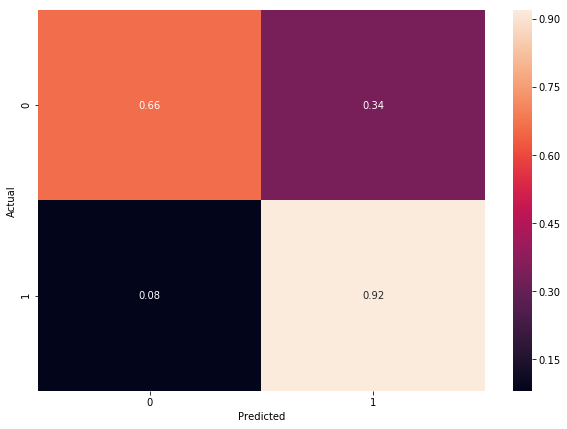

In [152]:
print( "----Confusion Matrix----")
Confusion_Matrix=confusion_matrix(Y_test_set,KNNclf.predict(X_test))
Prop_Confusion_Matrix=Confusion_Matrix / Confusion_Matrix.astype(np.float).sum(axis=1)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(Prop_Confusion_Matrix,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

----Confusion Matrix----


Text(69.0, 0.5, 'Actual')

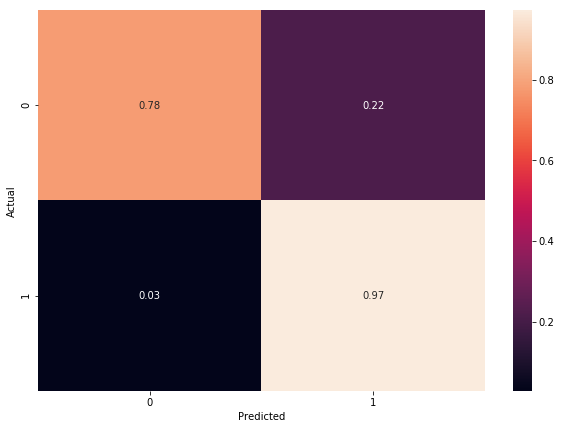

In [173]:
print( "----Confusion Matrix----")
Confusion_Matrix=confusion_matrix(Y_train_set,KNNclf.predict(X_train))
Prop_Confusion_Matrix=Confusion_Matrix / Confusion_Matrix.astype(np.float).sum(axis=1)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(Prop_Confusion_Matrix,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [155]:
print( "----Classification Report----")
Test_Classification_Report=classification_report(Y_test_set,KNNclf.predict(X_test))
print(Test_Classification_Report)

----Classification Report----
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      6578
           1       0.73      0.92      0.81      6578

   micro avg       0.79      0.79      0.79     13156
   macro avg       0.81      0.79      0.79     13156
weighted avg       0.81      0.79      0.79     13156



In [170]:
print( "----Classification Report----")
Test_Classification_Report=classification_report(Y_train_set,KNNclf.predict(X_train))
print(Test_Classification_Report)

----Classification Report----
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     13386
           1       0.82      0.97      0.89     13386

   micro avg       0.88      0.88      0.88     26772
   macro avg       0.89      0.88      0.88     26772
weighted avg       0.89      0.88      0.88     26772



In [156]:
    Predicted_Y_Train_probs_K = KNNclf.predict_proba(X_train)[:,1]
    Train_AUC_K = roc_auc_score(Y_train_set,  Predicted_Y_Train_probs_K).round(2)
    Train_AUC_K

0.97

In [157]:
    Predicted_Y_test_probs_K = KNNclf.predict_proba(X_test)[:,1]
    Test_AUC_K = roc_auc_score(Y_test_set,  Predicted_Y_test_probs_K).round(2)
    Test_AUC_K

0.88

### Random Forest Grid Search Model

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [127]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameters 
param_grid = {"n_estimators": [20,30,50,75,100],
              "max_features": [2, 4, 6,20,30],
              'random_state':[0]}

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(RFclf, param_grid, cv = 5, scoring = 'roc_auc')
rf_Grid.fit(X_train,Y_train_set)

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [2, 4, 6, 20, 30], 'n_estimators': [20, 30, 50, 75, 100], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [128]:
rf_Grid.best_params_

{'max_features': 30, 'n_estimators': 100, 'random_state': 0}

In [132]:
Best_Model=rf_Grid.best_estimator_
Best_Model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=30, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [130]:
print('Accuracy on the training subset:{:.3f}'.format(Best_Model.score(X_train,Y_train_set)))
print('Accuracy on the test subset:{:.3f}'.format(Best_Model.score(X_test,Y_test_set)))

Accuracy on the training subset:0.825
Accuracy on the test subset:0.819


----Confusion Matrix----


Text(69.0, 0.5, 'Actual')

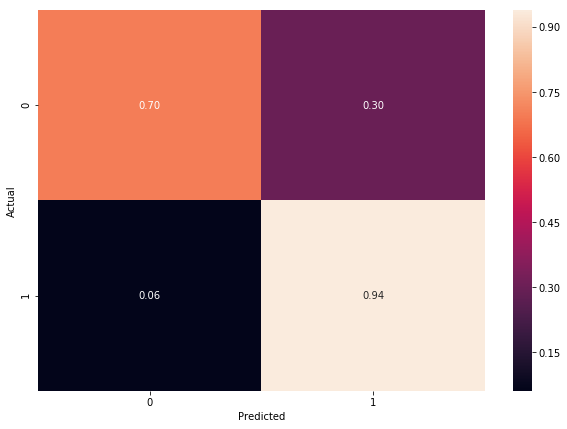

In [146]:
print( "----Confusion Matrix----")
Confusion_Matrix=confusion_matrix(Y_test_set,Best_Model.predict(X_test))
Prop_Confusion_Matrix=Confusion_Matrix / Confusion_Matrix.astype(np.float).sum(axis=1)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(Prop_Confusion_Matrix,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

----Confusion Matrix----


Text(69.0, 0.5, 'Actual')

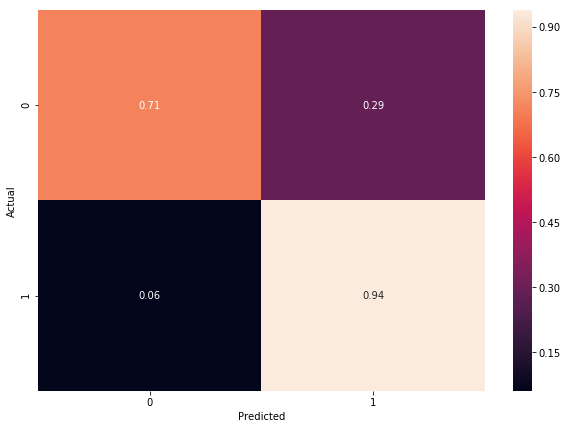

In [174]:
print( "----Confusion Matrix----")
Confusion_Matrix=confusion_matrix(Y_train_set,Best_Model.predict(X_train))
Prop_Confusion_Matrix=Confusion_Matrix / Confusion_Matrix.astype(np.float).sum(axis=1)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(Prop_Confusion_Matrix,annot=True,fmt='.2f')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [147]:
print( "----Classification Report----")
Test_Classification_Report=classification_report(Y_test_set,Best_Model.predict(X_test))
print(Test_Classification_Report)

----Classification Report----
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      6578
           1       0.76      0.94      0.84      6578

   micro avg       0.82      0.82      0.82     13156
   macro avg       0.84      0.82      0.82     13156
weighted avg       0.84      0.82      0.82     13156



In [171]:
print( "----Classification Report----")
Test_Classification_Report=classification_report(Y_train_set,Best_Model.predict(X_train))
print(Test_Classification_Report)

----Classification Report----
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     13386
           1       0.76      0.94      0.84     13386

   micro avg       0.82      0.82      0.82     26772
   macro avg       0.84      0.82      0.82     26772
weighted avg       0.84      0.82      0.82     26772



In [150]:
    Predicted_Y_Train_probs_RG = Best_Model.predict_proba(X_train)[:,1]
    Train_AUC_RG = roc_auc_score(Y_train_set,  Predicted_Y_Train_probs_RG).round(2)
    Train_AUC_RG

0.91

In [151]:
    Predicted_Y_test_probs_RG = Best_Model.predict_proba(X_test)[:,1]
    Test_AUC_RG = roc_auc_score(Y_test_set,  Predicted_Y_test_probs_RG).round(2)
    Test_AUC_RG

0.9

### Support Vector Machines

In [165]:
from sklearn.svm import SVC

SVC_clf = SVC(kernel='poly')
SVC_clf.fit(X_train,Y_train_set)

/home/jupyter/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jupyter/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [166]:
print('Accuracy on the training subset:{:.3f}'.format(SVC_clf.score(X_train,Y_train_set)))
print('Accuracy on the test subset:{:.3f}'.format(SVC_clf.score(X_test,Y_test_set)))

Accuracy on the training subset:0.803
Accuracy on the test subset:0.780


### Support Vector Machines Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':np.arange(0.1,0.5,1),'gamma':[0.001, 0.01, 0.1, 1],'degree':[2,3,4,5,6],
              'kernel':['poly']}
PSVC_grid = GridSearchCV(SVC_clf,param_grid, refit = True, cv=5, verbose=0,n_jobs=4)
PSVC_grid.fit(X_train,Y_train_set)